In [132]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pymongo import MongoClient
import datetime

In [133]:
timeSeriesData = pd.DataFrame(columns=['symbol','date','cur_price','trade_quantity','updown_rate'])

In [134]:
client = MongoClient('mongodb://127.0.0.1:27017/')
db = client['mph']
# print(db)
collection_price = db['crypto_prices']

In [135]:
price_data = collection_price.find({'symbol':'LAT'})

In [136]:
index = 0

for price_detail in price_data:
    timeSeriesData.loc[index, 'symbol'] = price_detail['symbol']
    timeSeriesData.loc[index,'date']= price_detail['date']
    timeSeriesData.loc[index, 'cur_price'] = price_detail['cur_price']
    timeSeriesData.loc[index, 'trade_quantity'] = price_detail['trade_quantity']/10000000 # OMG Normalization
    timeSeriesData.loc[index, 'updown_rate'] = price_detail['updown_rate']
    index+=1

In [137]:
timeSeriesData = timeSeriesData.sort_values(['date'])

In [138]:
startDate1 = "2018-03-02"
endDate1 = "2019-12-04"

startDate = datetime.datetime.strptime(startDate1,"%Y-%m-%d")
endDate = datetime.datetime.strptime(endDate1,"%Y-%m-%d")

In [139]:
monthDate = startDate +pd.DateOffset(months=3)

In [140]:
timeSeriesData1 = timeSeriesData.loc[(timeSeriesData['date'] >= startDate) & (timeSeriesData['date'] <= endDate), :]

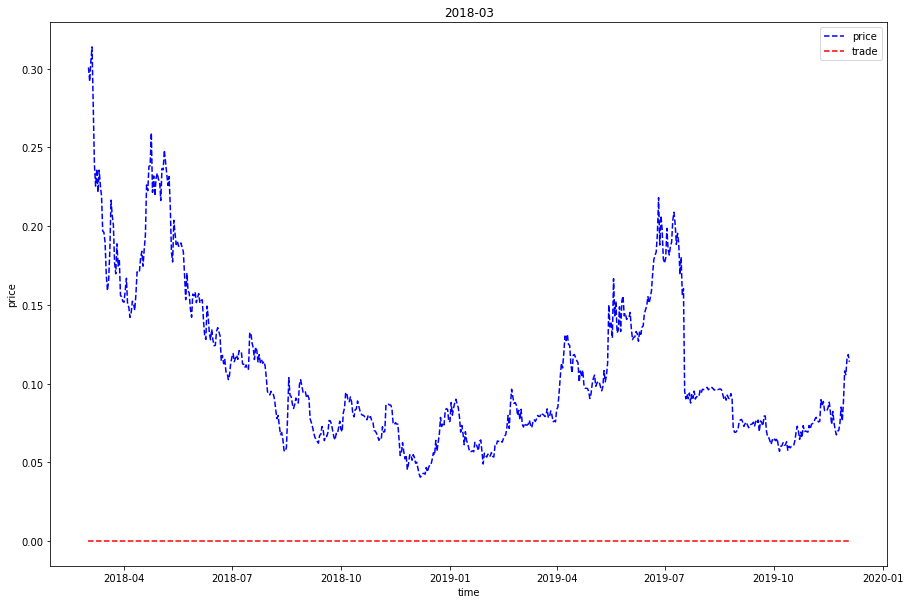

In [141]:
plt.figure(figsize=(15,10))
plt.plot(timeSeriesData1['date'].values, timeSeriesData1['cur_price'].values,'b--')
#plt.plot(timeSeriesCountData1['date'].values, timeSeriesCountData1['count'].values, 'ro')
plt.plot(timeSeriesData1['date'].values, timeSeriesData1['trade_quantity'].values, 'r--')
plt.title(startDate.strftime('%Y-%m'))
plt.xlabel('time')
plt.ylabel('price')
plt.legend(['price','trade','downhill'])
plt.show()